<a href="https://colab.research.google.com/github/brunaguedes92/curso_ciencia_dados2021/blob/master/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Trabalho Final - Ciência de Dados - Enap / 2021

### Apresentação do Dataset

In [ ]:
IMDb é o site de filmes mais popular e combina a descrição do enredo do filme, avaliações e análises de críticos e usuários, datas de lançamento e muitos outros aspectos.

Utilizarei dois conjuntos de dados nesse estudo: 

O conjunto de dados de filmes(movies) inclui 85.855 filmes com atributos como descrição do filme, avaliação média, número de votos, gênero, etc.

O conjunto de dados de classificações(ratings) inclui 85.855 detalhes de classificação do ponto de vista demográfico.

#### Link para Download do Dataset

In [ ]:
https://www.kaggle.com/stefanoleone992/imdb-extensive-dataset

### Motivação Pessoal

In [ ]:
Descobrir filmes que eu possa gostar, baseado nas investigações de avaliações e características, e ter momentos de lazer em casa no isolamento social.

### Investigação

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # Biblioteca para plotar gráficos
import seaborn as sns # Biblioteca para plotar gráficos baseada no matplotlib

Dados de filmes

In [5]:

df_movies = pd.read_csv('https://raw.githubusercontent.com/brunaguedes92/curso_ciencia_dados2021/master/data/originais/imdb/IMDb_movies.csv', encoding='UTF-8')
df_movies.head(2)


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0


Dados de Avaliação

In [6]:
df_ratings = pd.read_csv('https://raw.githubusercontent.com/brunaguedes92/curso_ciencia_dados2021/master/data/originais/imdb/IMDb_ratings.csv', encoding='UTF-8')
df_ratings.head(2)


,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0


Merge das duas bases

In [7]:
df_movies_ratings = pd.merge(df_movies, df_ratings, on=['imdb_title_id'])

**Quais são os top 5 filmes para mulheres de 30 anos?**


In [8]:
top_filmes = df_movies_ratings[['original_title', 'total_votes', 'females_30age_avg_vote', 'avg_vote', 'males_30age_avg_vote']].sort_values(ascending=False, by=['females_30age_avg_vote', 'avg_vote'])
top_filmes.head(5)

,original_title,total_votes,females_30age_avg_vote,avg_vote,males_30age_avg_vote
55310,Jeeudo,130,10.0,9.8,10.0
54835,Orbius,225,10.0,9.3,7.8
79258,The Transcendents,1450,10.0,9.2,6.7
52303,Precure Miracle Universe Movie,110,10.0,9.0,4.2
54446,Breakout,165,10.0,9.0,6.1


Os filmes acima tem avaliações boas, mas poucos votos. Seguindo as dicas dos professores do curso de Ciência de Dados, resolvi pesquisar novamente com um filtro de mais de 500.000 votos para ter dicas mais confiáveis.

In [9]:
top_5_movies = top_filmes[top_filmes['total_votes'] > 500000].head(5)
top_5_movies

,original_title,total_votes,females_30age_avg_vote,avg_vote,males_30age_avg_vote
28453,The Shawshank Redemption,2278845,9.2,9.3,9.3
15528,The Godfather,1572674,8.9,9.2,9.2
27629,Schindler's List,1183248,8.9,8.9,8.9
8973,12 Angry Men,668473,8.8,8.9,8.9
34127,The Lord of the Rings: The Return of the King,1604280,8.8,8.9,8.8


[Text(0, 0.5, 'Título'), Text(0.5, 0, 'Nota Média - Mulheres 30 anos')]

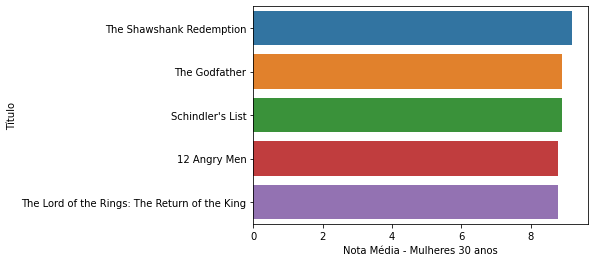

In [62]:
g = sns.barplot(data=top_5_movies, x='females_30age_avg_vote', y='original_title', orient="h")
g.set(xlabel='Nota Média - Mulheres 30 anos', ylabel='Título')

**The Shawshank Redemption**
Parece ser um filme interessante. 
Como pretendo ver um filme com meu marido também, vou ver a correlação de avaliação de filmes de mulheres e homens de 30 anos.

In [11]:
df_movies_ratings[['females_30age_avg_vote', 'males_30age_avg_vote']].corr()

,females_30age_avg_vote,males_30age_avg_vote
females_30age_avg_vote,1.00000,0.74744
males_30age_avg_vote,0.74744,1.00000


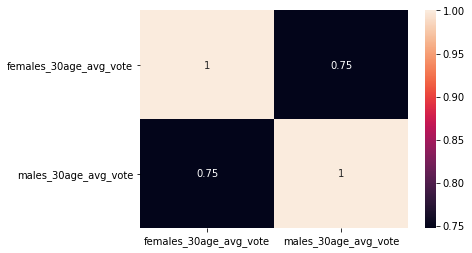

In [78]:
sns.heatmap(df_movies_ratings[['females_30age_avg_vote', 'males_30age_avg_vote']].corr(), annot=True)

Parece que as avaliações de homens e mulheres de 30 anos tem uma correlação forte, pois o coeficiente é maior que 0,7.

Agora vou ver quais são os top 5 filmes para homens de 30 anos, novamente com o filtro de mais de 500 mil votos

[Text(0, 0.5, 'Título'), Text(0.5, 0, 'Nota Média - Homens 30 anos')]

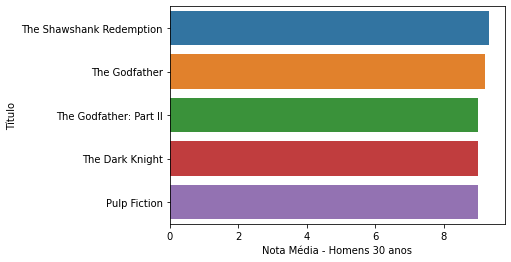

In [64]:
top_filmes_m = df_movies_ratings[['original_title', 'total_votes', 'males_30age_avg_vote', 'avg_vote']].sort_values(ascending=False, by=['males_30age_avg_vote', 'avg_vote'])
top_5_movies_m = top_filmes_m[top_filmes_m['total_votes'] > 500000].head(5)
h = sns.barplot(data=top_5_movies_m, x='males_30age_avg_vote', y='original_title', orient="h")
h.set(xlabel='Nota Média - Homens 30 anos', ylabel='Título')

Novamente o filme **The Shawshank Redemption** aparece em primeiro lugar. **The Godfather** também aparece no outro top 5. 

Agora eu quero ver a distribuição de votos (1 - 10) que **The Shawshank Redemption** teve.

In [16]:
df_movies_ratings[df_movies_ratings['original_title'] == 'The Shawshank Redemption']

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
28453,tt0111161,Le ali della libertà,The Shawshank Redemption,1994,1995-02-10,Drama,142,USA,English,Frank Darabont,"Stephen King, Frank Darabont",Castle Rock Entertainment,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Two imprisoned men bond over a number of years...,9.3,2278845,$ 25000000,$ 28699976,$ 28815245,80.0,8232.0,164.0,9.3,2278845,9.1,10.0,1259076,582166,264604,84779,25558,13167,6419,4615,4303,34158,9.3,1898.0,9.3,489526.0,9.3,863727.0,9.1,204278.0,9.3,1392803.0,9.3,1327.0,9.3,389793.0,9.3,721951.0,9.1,165852.0,9.2,274168.0,9.0,267.0,9.2,88528.0,9.2,129249.0,9.2,34317.0,8.9,906.0,9.3,327264.0,9.2,887226.0


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


[Text(0, 0.5, 'Quantidade (Milhões)'), Text(0.5, 0, 'Notas')]

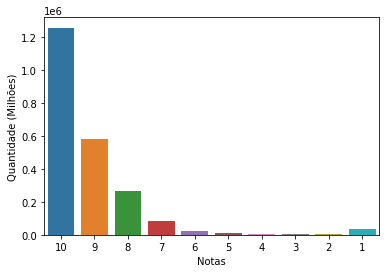

In [76]:
df2 = df_movies_ratings[df_movies_ratings['original_title'] == 'The Shawshank Redemption']
df2.rename(columns={"votes_10": "10", "votes_9": "9", "votes_8": "8", "votes_7": "7", "votes_6": "6", "votes_5": "5", "votes_4": "4", "votes_3": "3", "votes_2": "2", "votes_1": "1" }, inplace=True)
df2 = df2[['10', '9', '8', '7', '6', '5', '4', '3', '2', '1']].melt()
g2 = sns.barplot(data=df2, x='variable', y='value')
g2.set(xlabel="Notas", ylabel="Quantidade (Milhões)")

**Qual é o gênero de filmes que mulheres 30 anos avaliam melhor?**



Como a coluna gênero tem atributo multivalorado, é necessário fazer uma separação


In [28]:
 def explode_and_merge(df, col, merge_on='id', split_on=";", topn=None):
    """Transforma um atributo multivalorado em várias linhas de conteúdo atômico,
       uma linha pra cada um dos atributos separados por ponto e vírgula
    """
    # Cria um novo dataframe
    df_exp = df[[col, merge_on]].assign(**{col: df[col].str.split(split_on)}).explode(col)
    df_merged = df_exp.merge(right=df, on=merge_on, how='left', suffixes=["", "_y"])
    if topn:
        sel_topn = df_merged[col].isin(df_merged[col].value_counts().head(topn).index)
        df_merged = df_merged[sel_topn]
    return df_merged

In [36]:
df = explode_and_merge(df_movies_ratings, 'genre', 'imdb_title_id', ', ')
df.head(2)


,genre,imdb_title_id,title,original_title,year,date_published,genre_y,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,Romance,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,Biography,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0


In [30]:
df_avg_female30 =  df['females_30age_avg_vote'].groupby([df['genre']]).mean().sort_values(ascending=False).head(5).reset_index()
df_avg_female30


,genre,females_30age_avg_vote
0,Documentary,8.450000
1,Biography,6.720185
2,Film-Noir,6.676399
3,History,6.675350
4,War,6.631876


Documentário teve maior média de notas e menos 'outliers'


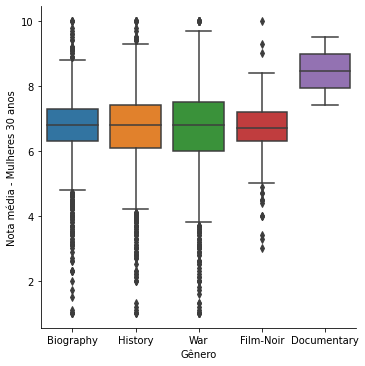

In [77]:
df_female30 = df[df['genre'].isin(df_avg_female30['genre'])]
g3 = sns.catplot(data=df_female30, x='genre', y='females_30age_avg_vote', kind='box')
g3.set(xlabel="Gênero", ylabel="Nota média - Mulheres 30 anos")

### Conclusões e Achados

Após essa análise, descobri que The Shawshank Redemption é um filme que eu certamente vou assistir com meu marido. 
Assim como The Godfather . São filmes populares e têm avaliações boas por pessoas na minha faixa etária.
Além disso tem uma boa ditribuição de notas acima de 8.


Como próximo desafio, sugiro encontrar através de apis ou webscrapping se esses filmes estão disponíveis nas plataformas de streaming e em quais.